In [144]:
import math
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [133]:
df = pd.read_csv('D:\Repositories\courses_analysis\sample.csv')
print('shape: '+str(df.shape[0]))
df.head()

shape: 1099


,Unnamed: 0,title,url,rate,teach_rate,new_carr,advent,earn_more,level,lang,exec_time,chap_cnt,course_dur,chap_avg_dur,edu_name
0,0,Programming for Everybody (Getting Started wit...,https://ru.coursera.org/learn/python?specializ...,4.8,4.85,39.0,39.0,12.0,NaN,2.0,NaN,7,1140,162.857143,Мичиганский университет
1,1,Структуры данных в Python,https://ru.coursera.org/learn/python-data?spec...,4.9,4.87,31.0,32.0,12.0,NaN,2.0,NaN,7,1140,162.857143,Мичиганский университет
2,2,Using Python to Access Web Data,https://ru.coursera.org/learn/python-network-d...,4.8,4.85,34.0,33.0,15.0,NaN,2.0,NaN,6,1140,190.000000,Мичиганский университет
3,3,Using Databases with Python,https://ru.coursera.org/learn/python-databases...,4.8,4.88,34.0,34.0,13.0,NaN,2.0,NaN,5,900,180.000000,Мичиганский университет
4,4,Что такое наука о данных?,https://ru.coursera.org/learn/what-is-datascience,4.7,4.68,41.0,40.0,NaN,1.0,2.0,NaN,3,600,200.000000,IBM


In [134]:
float_feature = df[['teach_rate', 'new_carr', 'advent', 'earn_more', 'chap_cnt', 'course_dur', 'chap_avg_dur']]

print('correlation with target:\n\n', float_feature.corrwith(df.rate))
float_feature.corr()

correlation with target:

 teach_rate      0.732397
new_carr        0.034195
advent          0.080321
earn_more      -0.071946
chap_cnt        0.169633
course_dur      0.090225
chap_avg_dur    0.014704
dtype: float64


,teach_rate,new_carr,advent,earn_more,chap_cnt,course_dur,chap_avg_dur
teach_rate,1.000000,0.079175,0.068682,-0.079984,0.144847,0.078124,0.004437
new_carr,0.079175,1.000000,0.713541,0.212726,-0.063340,-0.081603,-0.056735
advent,0.068682,0.713541,1.000000,0.514367,-0.118167,-0.036315,0.004889
earn_more,-0.079984,0.212726,0.514367,1.000000,0.016702,0.043287,0.032435
chap_cnt,0.144847,-0.063340,-0.118167,0.016702,1.000000,0.418041,0.026770
course_dur,0.078124,-0.081603,-0.036315,0.043287,0.418041,1.000000,0.887019
chap_avg_dur,0.004437,-0.056735,0.004889,0.032435,0.026770,0.887019,1.000000


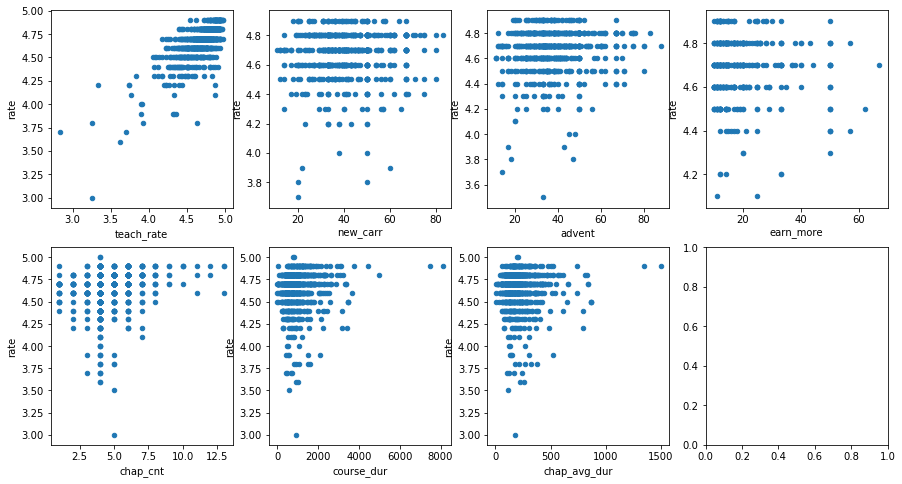

In [142]:
data = float_feature.assign(rate=df.rate)

nrows = math.ceil((len(data.columns)-1)/4)
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(15, 4*nrows))
for idx, feature in enumerate(data.columns[:-1]):
    data.plot(feature, 'rate', subplots=True, kind='scatter', ax=axes[idx // 4, idx % 4])

normalizing float features to [0, 1]

In [149]:
normalized_float_feature = StandardScaler().fit_transform(float_feature)

data = normalized_float_feature.assign(rate=df.rate)

nrows = math.ceil((len(data.columns)-1)/4)
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(15, 4*nrows))
for idx, feature in enumerate(data.columns[:-1]):
    data.plot(feature, 'rate', subplots=True, kind='scatter', ax=axes[idx // 4, idx % 4])

AttributeError: 'numpy.ndarray' object has no attribute 'assign'

In [100]:
for feature_name in data.columns[1:]:
    max_val = data[feature_name].max()
    min_val = data[feature_name].min()
    data[feature_name] = data[feature_name].apply(lambda x: (x-min_val)/(max_val-min_val))

<ipython-input-100-be0a0a330066>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



adding categorial features as set of binary features

In [101]:
for feature_name in ['LEVEL', 'LANGUAGE']:
    for value in df[feature_name].dropna().unique():
        data[feature_name+'=='+str(value)] = df[feature_name].apply(lambda x: 1 if x == value else 0)

data.head()

<ipython-input-101-e85ef94e84fe>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,RATING,TEACHER_RATING,NEW_CARRIER,TAKE_ADVANTAGES,EARN_MORE,CHAPTERS_CNT,COURSE_DUR,CHAP_AVG_DUR,LEVEL==1.0,LEVEL==2.0,LEVEL==3.0,LANGUAGE==2.0,LANGUAGE==1.0
0,4.8,0.939535,0.388889,0.363636,0.035088,0.538462,0.140741,0.108571,0,0,0,1,0
1,4.9,0.948837,0.277778,0.272727,0.035088,0.538462,0.140741,0.108571,0,0,0,1,0
2,4.8,0.939535,0.319444,0.285714,0.087719,0.461538,0.140741,0.126667,0,0,0,1,0
3,4.8,0.953488,0.319444,0.298701,0.052632,0.384615,0.111111,0.120000,0,0,0,1,0
4,4.7,0.860465,0.416667,0.376623,NaN,0.230769,0.074074,0.133333,1,0,0,1,0


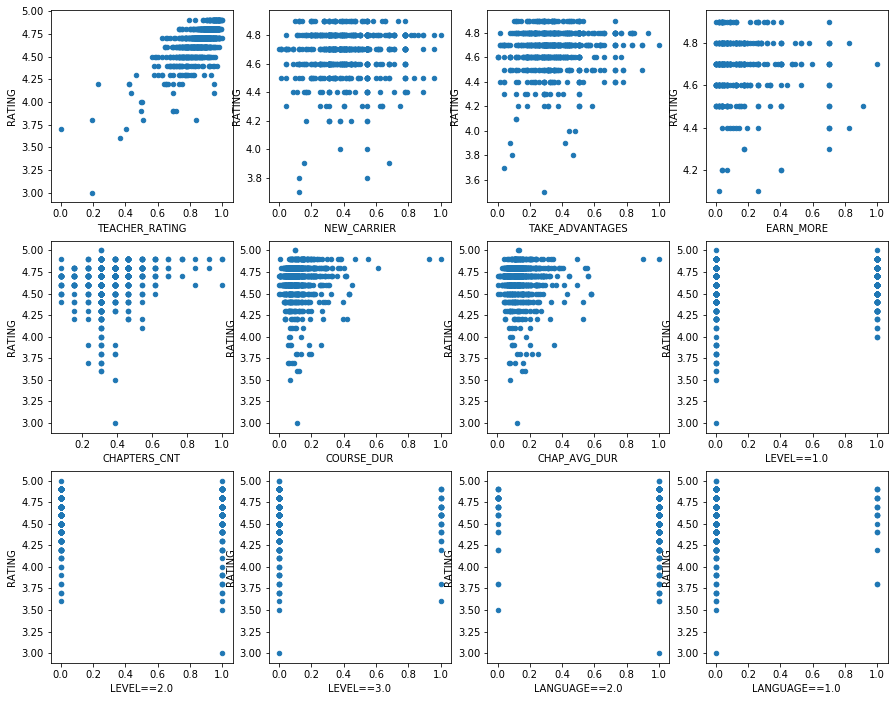

In [102]:
nrows = math.ceil((len(data.columns)-1)/4)
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(15, 4*nrows))
for idx, feature in enumerate(data.columns[1:]):
    data.plot(feature, 'RATING', subplots=True, kind='scatter', ax=axes[idx // 4, idx % 4])

In [103]:
data_1 = data.dropna()

x = data_1[data_1.columns[1:]]
y = data_1.RATING

### models

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
x_train = x[:200]
y_train = y[:200]
x_test = x[200:]
y_test = y[200:]

model = LinearRegression()
model.fit(x_train, y_train)
p = model.predict(x_test)

In [115]:
s = 0
k = 0
for ax, y in zip(p, y_train):
    s += (y-ax)**2
    k += 1
    
print(s/k)

0.03859000249837565


In [112]:
from sklearn.linear_model import LassoCV

In [124]:
data_2 = (data.dropna())[['RATING', 'TEACHER_RATING', 'LEVEL==1.0', 'LEVEL==2.0', 'LEVEL==3.0']]
x = data_2[data_2.columns[1:]]
y = data_2.RATING

alphas = np.apply_along_axis(lambda x: x/1000, 0, np.arange(1, 100, 5))
#alphas = np.arange(1, 100, 5)

model = LassoCV(alphas=alphas, cv=3, random_state=1)
model.fit(x, y)

LassoCV(alphas=array([0.001, 0.006, 0.011, 0.016, 0.021, 0.026, 0.031, 0.036, 0.041,
       0.046, 0.051, 0.056, 0.061, 0.066, 0.071, 0.076, 0.081, 0.086,
       0.091, 0.096]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=1, selection='cyclic', tol=0.0001,
        verbose=False)

In [123]:
model.mse_path_

array([[0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ],
       [0.01770386, 0.01893816, 0.0181179 ]])